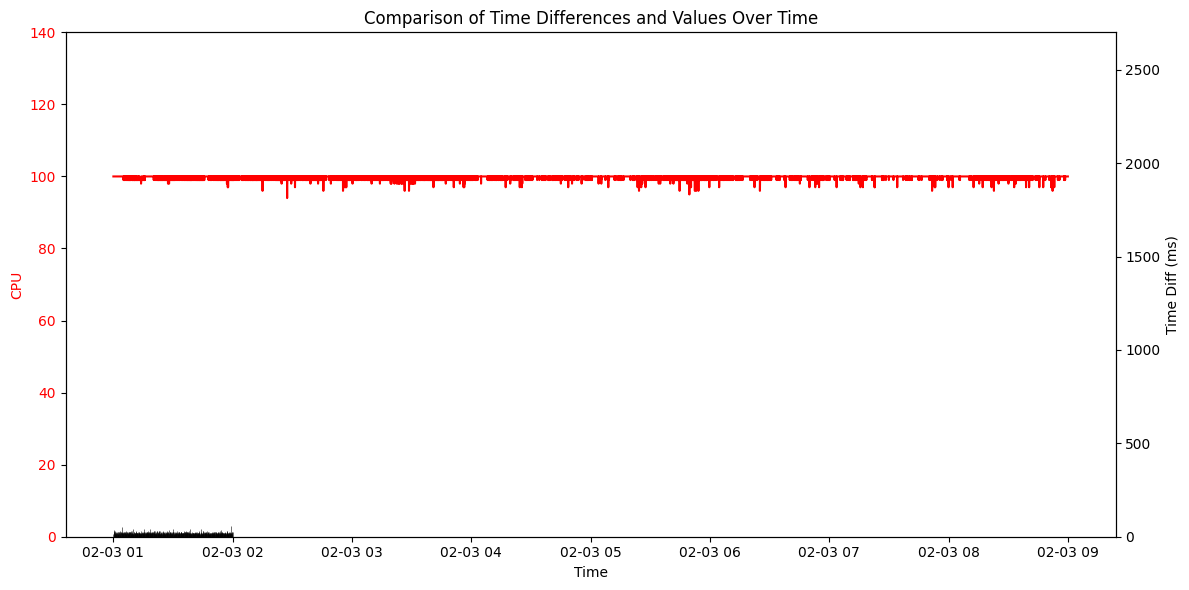

MSB top 5 values:


NameError: name 'msb_top5' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------------------
column = "total"
file1 = r'D:\BA\Results\v1t3\cpu.csv'
file2 = r'D:\BA\Results\v1t3\1.csv'
chart_save = r'D:\BA\Results\v1t3\chart.png'
#-----------------------------------------------------------------------------------------

# Read the CPU file normally
df1 = pd.read_csv(file1, low_memory=False, encoding='utf-8')
df1['time'] = pd.to_datetime(df1['time'])
df1[column] = pd.to_numeric(df1[column], errors='coerce')  # Ensure the column is numeric

# Process the large CSV file in chunks
chunks = []
chunksize = 100000  # Adjust chunk size as needed
for chunk in pd.read_csv(file2, usecols=['time'], low_memory=False, chunksize=chunksize):
    chunk['time'] = pd.to_datetime(chunk['time'])
    # Calculate time_diff within each chunk
    chunk['time_diff'] = chunk['time'].diff().dt.total_seconds() * 1000
    chunks.append(chunk)
    
df2 = pd.concat(chunks, ignore_index=True)

# Note: The diff between the last row of a chunk and the first row of the next chunk is not computed.
# If that's important, you'll need a more complex handling across chunks.

# Group every 5000 rows
df2['group'] = df2.index // 5000
df2 = df2.groupby('group').agg({'time': 'first', 'time_diff': 'max'}).reset_index(drop=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'red'
ax1.set_xlabel('Time')
ax1.set_ylabel('CPU', color=color)
ax1.plot(df1['time'], df1[column], color=color, label='Blue Value')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 140)

ax2 = ax1.twinx()
color = 'black'
ax2.set_ylabel('Time Diff (ms)', color=color)
ax2.vlines(df2['time'], 0, df2['time_diff'], color=color, label='Time Diff', linewidth=0.40)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 2700)

plt.title('Comparison of Time Differences and Values Over Time')
fig.tight_layout()
plt.savefig(chart_save, dpi=300)
plt.show()

# Extract top 5 values
print("MSB top 5 values:")
for time_diff, index, timestamp in msb_top5:
    print(f"{index}, {timestamp}, {time_diff} ms")

msb_time_diffs = df2['time_diff'].dropna()  # Ensure no NaN values
msb_std = msb_time_diffs.std()  # Calculate standard deviation
print(f"Standard Deviation: {msb_std:.2f} ms")
print("----------------------------------")
cpu_bottom5 = df1.nsmallest(5, column)[['time', column]]
print("CPU bottom 5:") 
print(cpu_bottom5)

cpu_std_gray = df1[column].dropna().std()  # Standard deviation for gray 
cpu_std_red = df1[column2].dropna().std()  # Standard deviation for red 
print(f"Standard Deviation (Gray - only MSB - {column}): {cpu_std_gray:.2f} %")
print(f"Standard Deviation (Red - Total - {column2}): {cpu_std_red:.2f} %")